## Arbitrary value imputation with Scikit-learn ==> SimpleImputer



Scikit-learn provides a class to perform the most common data imputation techniques.

The **SimpleImputer** provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

## Advantages

- Simple to use if applied to the entire dataframe
- Fast computation (it uses numpy for calculations)
- Imputes several types of values (you can indicate if the missing values are np.nan, or zeroes, etc)

## Limitations

- Returns a numpy array by default
- Modifies entire dataframe

## More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## Dataset:

To download the House Prices dataset, please refer to the lecture **Datasets** in **Section 2** of this course.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# transformers to impute missing data with sklearn:

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
# We use only the following variables for the demo,
# 3 of which contain NA:

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [ ]:
# let's load the House Prices dataset

data = pd.read_csv("../../Datasets/houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [ ]:
# let's check the misssing data

X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

# SimpleImputer - default

In [ ]:
# Now we impute the missing values with SimpleImputer

# Create an instance of the simple imputer
# indicating that we want to impute with a constant
# arbitrary value: 999

imputer = SimpleImputer(
    strategy="constant", # we want to impute with a constant value
    fill_value=999, # an arbitrary value of 999
)

# we fit the imputer to the train set
# the imputer assigns 999 to all variables
imputer.fit(X_train)

,missing_values,nan
,strategy,'constant'
,fill_value,999
,copy,True
,add_indicator,False
,keep_empty_features,False


For arbitrary value imputation, we need to set the `strategy` to `'constant'` and indicate the arbitrary value in the `fill_value` argument. 

In [ ]:
# we can look at the "learned" imputation values like this:

imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [ ]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array.

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[ 999.,    7.,  573., ..., 2034., 1998.,  576.],
       [ 999.,    6.,    0., ..., 1291., 1996.,  307.],
       [  50.,    5.,    0., ...,  858.,  999.,  117.],
       ...,
       [  68.,    6.,    0., ..., 1902., 1978.,    0.],
       [ 999.,    7.,   18., ..., 1557., 2003.,  143.],
       [  58.,    7.,   30., ..., 1839., 1998.,    0.]], shape=(1022, 9))

In [ ]:
# If we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # the variable names
)

X_train.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
0,999.0,7.0,573.0,318.0,1057.0,1057.0,2034.0,1998.0,576.0
1,999.0,6.0,0.0,288.0,1291.0,1291.0,1291.0,1996.0,307.0
2,50.0,5.0,0.0,162.0,858.0,858.0,858.0,999.0,117.0
3,60.0,6.0,0.0,356.0,560.0,698.0,1258.0,1939.0,0.0
4,60.0,2.0,0.0,0.0,290.0,438.0,438.0,1930.0,0.0


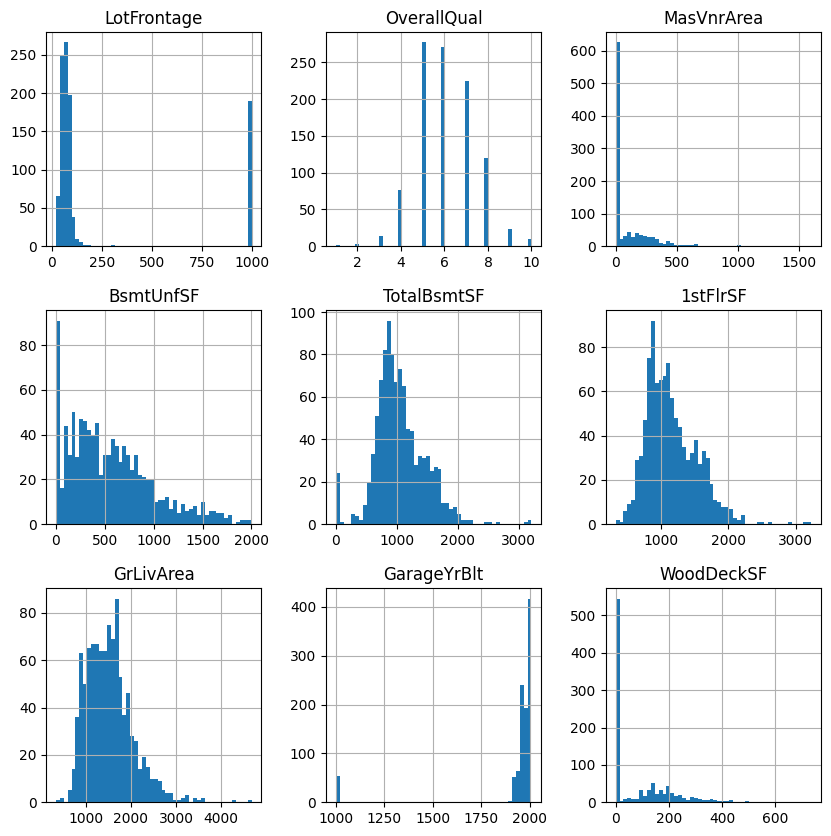

In [ ]:
# Let's explore the distributions after the imputation

X_train.hist(bins=50, figsize=(10, 10))

plt.show()

The tall bar at 999 in LotFrontage's histogram appeared after the imputation. You can also see the imputation effect on GarageYrBlt, with the bar at the far left right at the 999 value.

**Remember to be cautious with the order in which you pass the column names** as we discussed in the previous notebook.

# SimpleImputer - dataframe

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [ ]:
# set up the imputer

imputer = SimpleImputer(
    strategy="constant",
    fill_value=999,
).set_output(transform="pandas") # set output to be a dataframe

In [ ]:
# We fit the imputer to the train set.

imputer.fit(X_train)

,missing_values,nan
,strategy,'constant'
,fill_value,999
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
# the learn mean values:

imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [ ]:
# impute missing data

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# the resulting dataframe
X_train.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
64,999.0,7.0,573.0,318.0,1057.0,1057.0,2034.0,1998.0,576.0
682,999.0,6.0,0.0,288.0,1291.0,1291.0,1291.0,1996.0,307.0
960,50.0,5.0,0.0,162.0,858.0,858.0,858.0,999.0,117.0
1384,60.0,6.0,0.0,356.0,560.0,698.0,1258.0,1939.0,0.0
1100,60.0,2.0,0.0,0.0,290.0,438.0,438.0,1930.0,0.0


In [ ]:
# check missing values

X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

# SimpleImputer - feature subsets

To apply the imputation to a feature subset we need to use the [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

For this demo, I will impute each variable with a different arbitrary value.

In [ ]:
# We pass the features and the transformers to
# the column transformer.

# In this example, I will use the default parameter of ColumnTransformer
# remainder = drop, which means that only the imputed features will be retained, and the rest dropped.

imputer = ColumnTransformer(
    transformers=[
        (
            "imputer_LotFrontAge",
            SimpleImputer(strategy="constant", fill_value=999),
            ["LotFrontage"],
        ),
        (
            "imputer_MasVnrArea",
            SimpleImputer(strategy="constant", fill_value=-10),
            ["MasVnrArea"],
        ),
        (
            "imputer_GarageYrBlt",
            SimpleImputer(strategy="constant", fill_value=1700),
            ["GarageYrBlt"],
        ),
    ],
    remainder="drop",
)

In [ ]:
# set output to be a dataframe

imputer.set_output(transform="pandas")

,transformers,"[('imputer_LotFrontAge', ...), ('imputer_MasVnrArea', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,999


In [ ]:
# now we fit the preprocessor
imputer.fit(X_train)

,transformers,"[('imputer_LotFrontAge', ...), ('imputer_MasVnrArea', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,999


In [ ]:
# we can explore the transformers like this:

imputer.transformers

[('imputer_LotFrontAge',
  SimpleImputer(fill_value=999, strategy='constant'),
  ['LotFrontage']),
 ('imputer_MasVnrArea',
  SimpleImputer(fill_value=-10, strategy='constant'),
  ['MasVnrArea']),
 ('imputer_GarageYrBlt',
  SimpleImputer(fill_value=1700, strategy='constant'),
  ['GarageYrBlt'])]

In [ ]:
# and we can look at the parameters learned like this:

# for LotFrontAge
imputer.named_transformers_["imputer_LotFrontAge"].statistics_

array([999.])

In [ ]:
# for MasVnrArea

imputer.named_transformers_["imputer_MasVnrArea"].statistics_

array([-10.])

In [ ]:
# for GarageYrBlt

imputer.named_transformers_["imputer_GarageYrBlt"].statistics_

array([1700.])

In [ ]:
# and now we can impute the data

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train.head()

#look how the column names have changed because of the ColumnTransformer and added the imputer names as prefixes.

,imputer_LotFrontAge__LotFrontage,imputer_MasVnrArea__MasVnrArea,imputer_GarageYrBlt__GarageYrBlt
64,999.0,573.0,1998.0
682,999.0,0.0,1996.0
960,50.0,0.0,1700.0
1384,60.0,0.0,1939.0
1100,60.0,0.0,1930.0


Observe how the returned data contains only 3 variables, the ones for which we specified imputation values. This is the effect of specifying `remainder='drop'` in the columnTransformer.

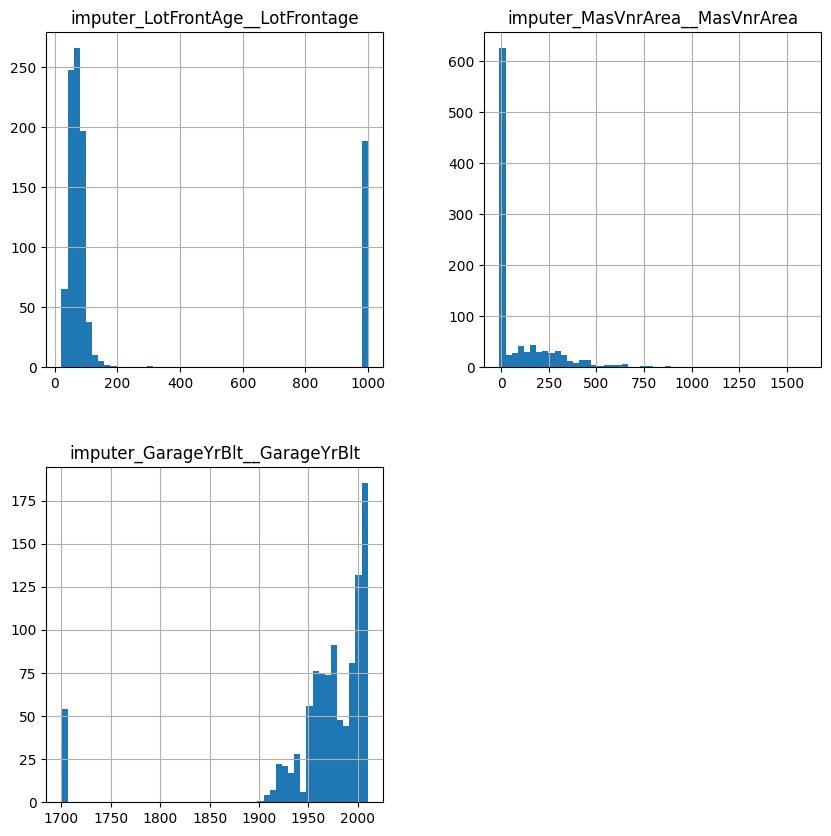

In [ ]:
X_train.hist(bins=50, figsize=(10, 10))

plt.show()

Note the bars corresponding to the arbitrary values at 1700, 999 and -1 for each feature.